In [1]:
import pandas as pd

data = pd.read_csv('D:\DEAP dataset\heart_rate_emotion_dataset.csv\heart_rate_emotion_dataset.csv')


print(data.head())


print(data.info())


print(data.isnull().sum())

   HeartRate  Emotion
0         65      sad
1         79  neutral
2         73  neutral
3        100    happy
4         99    angry
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   HeartRate  100000 non-null  int64 
 1   Emotion    100000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB
None
HeartRate    0
Emotion      0
dtype: int64


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   HeartRate  100000 non-null  int64 
 1   Emotion    100000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['emotion_encoded'] = label_encoder.fit_transform(data['Emotion'])


print(data[['Emotion', 'emotion_encoded']].drop_duplicates())

     Emotion  emotion_encoded
0        sad                5
1    neutral                4
3      happy                3
4      angry                0
7       fear                2
11  surprise                6
12   disgust                1


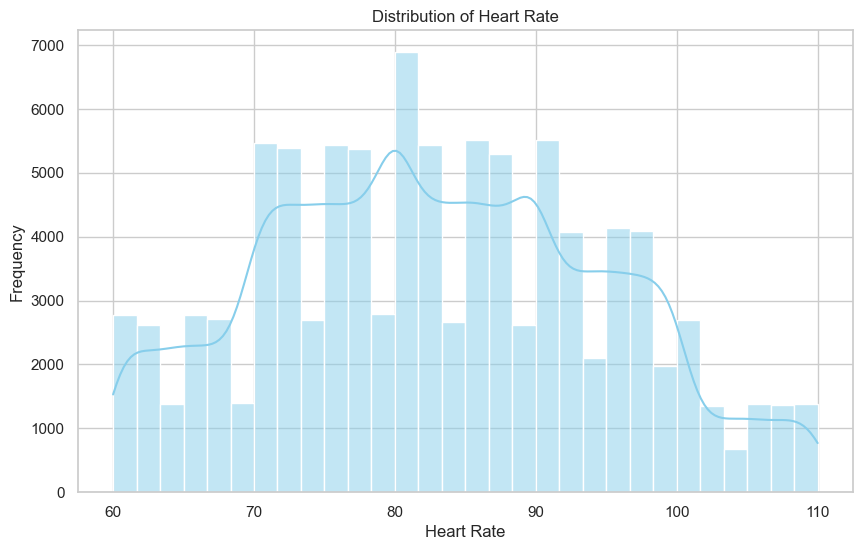

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data['HeartRate'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()

C:\Users\haomi\AppData\Local\Temp\ipykernel_7004\4274292238.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Emotion', data=data, palette='viridis')


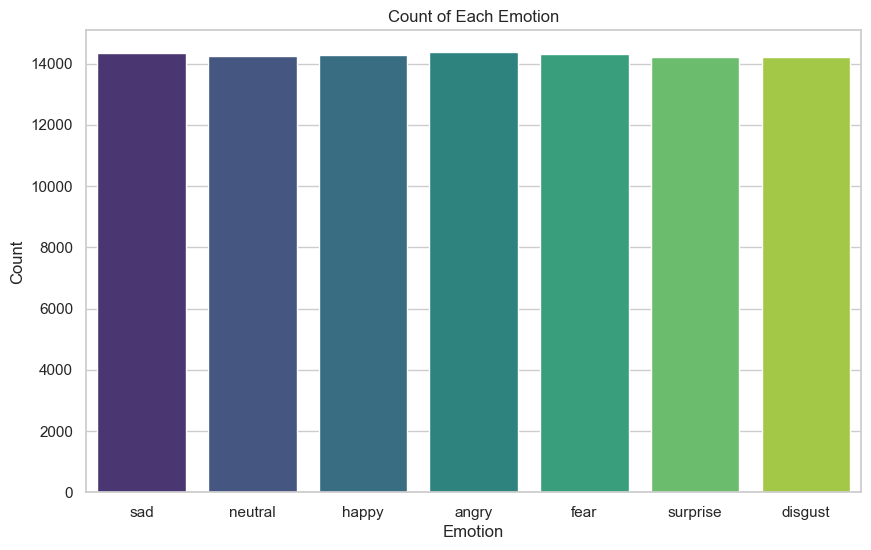

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Emotion', data=data, palette='viridis')
plt.title('Count of Each Emotion')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

C:\Users\haomi\AppData\Local\Temp\ipykernel_7004\960172589.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Emotion', y='HeartRate', data=data, palette='viridis')


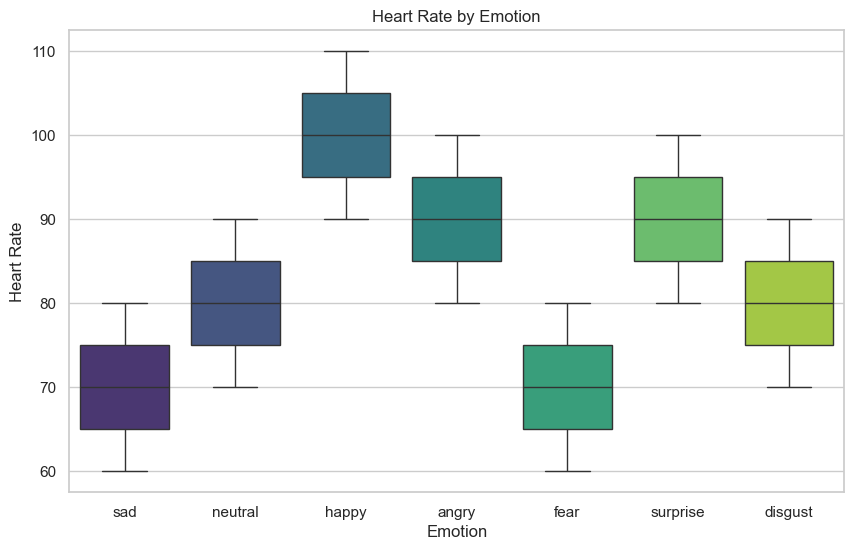

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Emotion', y='HeartRate', data=data, palette='viridis')
plt.title('Heart Rate by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Heart Rate')
plt.show()

              precision    recall  f1-score   support

       angry       0.29      0.48      0.36      4268
     disgust       0.25      0.23      0.24      4350
        fear       0.37      0.14      0.20      4344
       happy       0.85      0.52      0.65      4242
     neutral       0.24      0.23      0.24      4281
         sad       0.37      0.57      0.45      4238
    surprise       0.25      0.24      0.24      4277

    accuracy                           0.34     30000
   macro avg       0.37      0.34      0.34     30000
weighted avg       0.37      0.34      0.34     30000



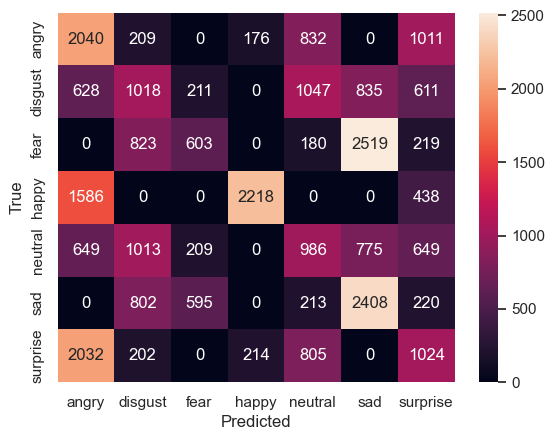

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X = data[['HeartRate']]


y = data['emotion_encoded']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)


print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()